<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## ACT vs SAT Percentiles by College

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read SAT/ACT College Data

colleges = pd.read_csv('../data/sat_act_by_college.csv')

In [3]:
colleges.head()
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


In [4]:
# Splitting and Converting 25th/75th Percentile Data

colleges[['SAT_25','SAT_75']] = colleges.iloc[:,6].str.split('-',expand=True).dropna(axis=1)
colleges[['ACT_25','ACT_75']] = colleges.iloc[:,7].str.split('-',expand=True).dropna(axis=1)

for i in ['SAT_25','SAT_75','ACT_25','ACT_75']:
    colleges[i] = pd.to_numeric(colleges[i],errors='coerce')

In [5]:
# Import data on SAT and ACT percentiles
# Data retrieved from blog.prepscholar.com

percentiles = pd.read_csv('../data/percentiles.csv')

In [6]:
# Merge colleges and percentiles to show percentile 

colleges = pd.merge(colleges,percentiles,how='left',left_on='SAT_25',right_on='sat_score')
colleges.drop(columns=['act_score','act_percent','sat_score','SAT_25'],axis=1,inplace=True)
colleges.rename({'sat_percent':'sat_percent_25'},axis=1,inplace=True)

colleges = pd.merge(colleges,percentiles,how='left',left_on='SAT_75',right_on='sat_score')
colleges.drop(columns=['act_score','act_percent','sat_score','SAT_75'],axis=1,inplace=True)
colleges.rename({'sat_percent':'sat_percent_75'},axis=1,inplace=True)

colleges = pd.merge(colleges,percentiles,how='left',left_on='ACT_25',right_on='act_score')
colleges.drop(columns=['act_score','sat_percent','sat_score','ACT_25'],axis=1,inplace=True)
colleges.rename({'act_percent':'act_percent_25'},axis=1,inplace=True)

colleges = pd.merge(colleges,percentiles,how='left',left_on='ACT_75',right_on='act_score')
colleges.drop(columns=['act_score','sat_percent','sat_score','ACT_75'],axis=1,inplace=True)
colleges.rename({'act_percent':'act_percent_75'},axis=1,inplace=True)



C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [7]:
# Create columns to show ACT bias at 25th and 75th percentile

colleges['ACT_bias_25'] = colleges['act_percent_25'] - colleges['sat_percent_25']
colleges['ACT_bias_75'] = colleges['act_percent_75'] - colleges['sat_percent_75']

In [8]:
colleges[['ACT_bias_25','ACT_bias_75']].describe()

,ACT_bias_25,ACT_bias_75
count,380.000000,383.000000
mean,5.421053,0.835509
std,5.640653,3.118362
min,-13.000000,-16.000000
25%,2.000000,-1.000000
50%,5.000000,0.000000
75%,9.000000,2.000000
max,29.000000,19.000000


<AxesSubplot:>

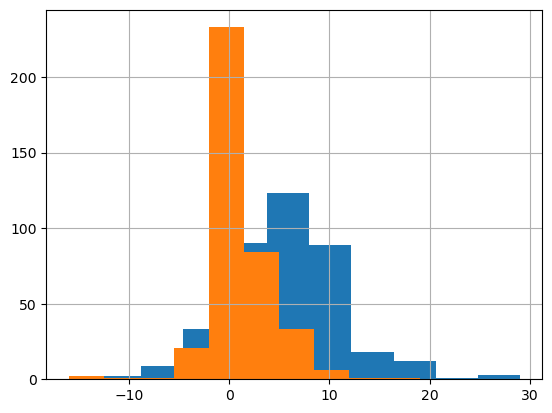

In [9]:
colleges['ACT_bias_25'].hist(bins=10)
colleges['ACT_bias_75'].hist(bins=10)

## Preferred Test by State

In [10]:
# Reading and converting the data
act_2017 = pd.read_csv('../data/act_2017.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')

act_2017['Participation'] = pd.to_numeric(act_2017['Participation'].str.strip('%'),errors='coerce')/100
sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].str.strip('%'),errors='coerce')/100



In [11]:
states = act_2017.merge(sat_2017,on='State',suffixes=['_act','_sat'])
states['act_bias'] = states['Participation_act'] - states['Participation_sat']

<AxesSubplot:>

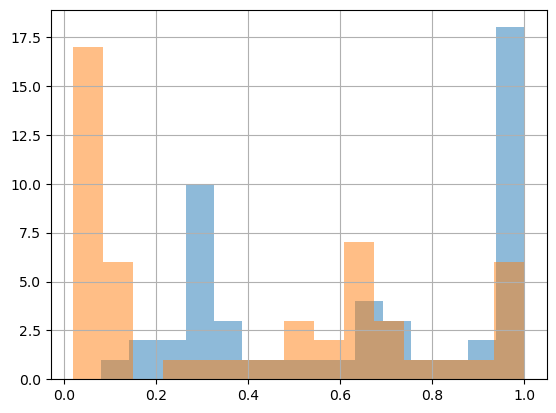

In [12]:
states['Participation_act'].hist(bins=15,alpha=0.5)
states['Participation_sat'].hist(bins=15,alpha=0.5)


<AxesSubplot:>

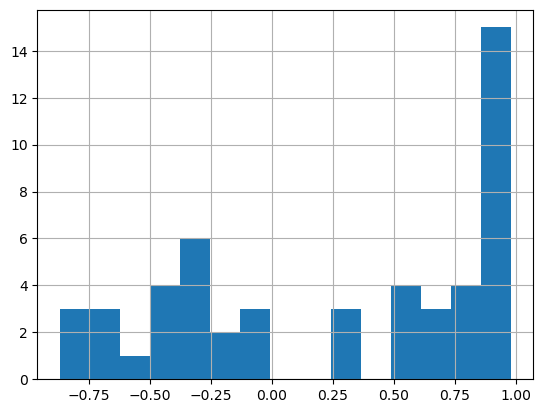

In [13]:
states['act_bias'].hist(bins=15)

In [14]:
states[['Participation_act','Participation_sat','act_bias']].describe()

,Participation_act,Participation_sat,act_bias
count,51.000000,51.000000,51.000000
mean,0.652549,0.398039,0.254510
std,0.321408,0.352766,0.646923
min,0.080000,0.020000,-0.870000
25%,0.310000,0.040000,-0.360000
50%,0.690000,0.380000,0.500000
75%,1.000000,0.660000,0.915000
max,1.000000,1.000000,0.980000


In [15]:
for state in states:
    group_1 = [state for state,bias in zip(states['State'],states['act_bias']) if bias < -0.36]
    group_2 = [state for state,bias in zip(states['State'],states['act_bias']) if ((bias >= -0.36) & (bias < 0.5))]
    group_3 = [state for state,bias in zip(states['State'],states['act_bias']) if ((bias >= 0.5) & (bias < 0.91))]
    group_4 = [state for state,bias in zip(states['State'],states['act_bias']) if bias >= 0.91]



In [16]:
print(group_1)
print(group_2)
print(group_3)
print(group_4)

['Connecticut', 'Delaware', 'District of Columbia', 'Idaho', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'New Hampshire', 'New York', 'Pennsylvania', 'Rhode Island', 'Virginia']
['Alaska', 'Arizona', 'California', 'Florida', 'Georgia', 'Hawaii', 'Indiana', 'New Jersey', 'Oregon', 'Texas', 'Vermont', 'Washington']
['Colorado', 'Illinois', 'Iowa', 'Kansas', 'Montana', 'Nebraska', 'Nevada', 'New Mexico', 'North Carolina', 'Ohio', 'South Carolina', 'South Dakota', 'West Virginia']
['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'North Dakota', 'Oklahoma', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']


In [17]:
enroll_st_grp = pd.read_csv('../data/college-enrollment-by-state-bias.csv')

In [18]:
colleges = colleges.merge(enroll_st_grp,how='left',left_on='School',right_on='Institution Name')

In [19]:
colleges = colleges[['School','ACT_bias_25','Group 1','Group 2','Group 3','Group 4']]



In [20]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   School       25760 non-null  object 
 1   ACT_bias_25  380 non-null    float64
 2   Group 1      4505 non-null   float64
 3   Group 2      4505 non-null   float64
 4   Group 3      4505 non-null   float64
 5   Group 4      4505 non-null   float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [21]:
colleges = colleges.dropna(subset=['ACT_bias_25','Group 1'],axis=0)

In [38]:
for i in range(1,5):
    colleges[f'Group {i}'] = colleges[f'Group {i}']/(colleges['Group 1']+colleges['Group 2'] +colleges['Group 3'] +colleges['Group 4']) 

colleges.rename({'ACT_bias_25':'ACT_bias','Group 1':'Strong SAT States','Group 2':'Weak SAT States','Group 3':'Weak ACT States','Group 4':'Strong ACT States'},axis=1,inplace=True)

In [39]:
colleges.corr()

,ACT_bias,Strong SAT States,Weak SAT States,Weak ACT States,Strong ACT States
ACT_bias,1.000000,-0.050303,-0.301431,-0.038942,0.244062
Strong SAT States,-0.050303,1.000000,0.017872,-0.015553,-0.539080
Weak SAT States,-0.301431,0.017872,1.000000,-0.078352,-0.617085
Weak ACT States,-0.038942,-0.015553,-0.078352,1.000000,-0.525552
Strong ACT States,0.244062,-0.539080,-0.617085,-0.525552,1.000000


In [64]:
fig, ax = plt.subplots(
sns.histplot(data='Strong SAT States',
                 x='ACT_bias',
                 ax=ax,
                 stat='count',
                 multiple='stack',
                 element='bars')
sns.histplot(data='Weak SAT States',
                 x='ACT_bias',
                 ax=ax,
                 stat='count',
                 multiple='stack',
                 element='bars')    
)



SyntaxError: invalid syntax (1877823196.py, line 8)

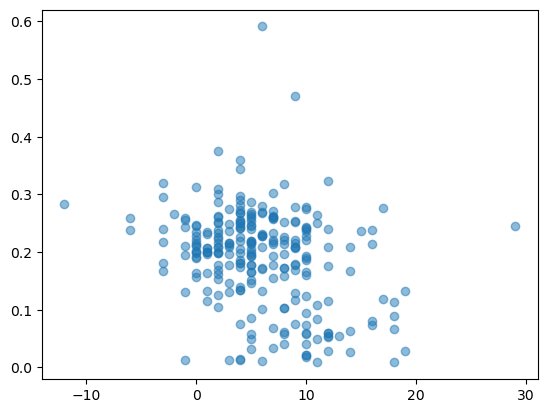

In [46]:
plt.scatter(colleges['ACT_bias'],colleges['Weak SAT States'],alpha=0.5)

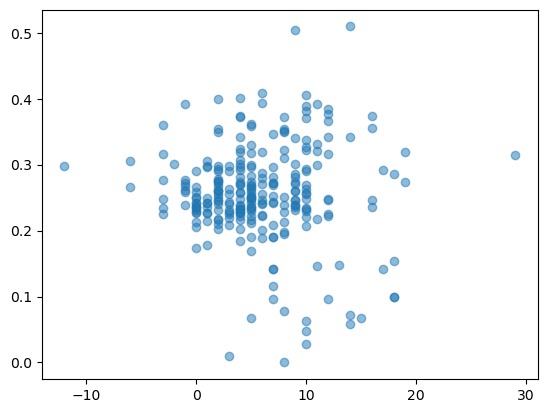

In [47]:
plt.scatter(colleges['ACT_bias'],colleges['Weak ACT States'],alpha=0.5)


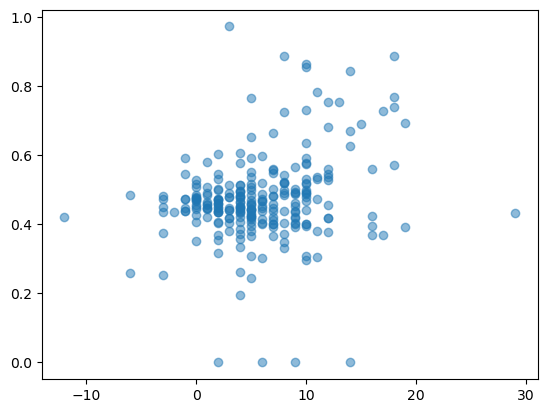

In [48]:
plt.scatter(colleges['ACT_bias'],colleges['Strong ACT States'],alpha=0.5)

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [22]:
# Code:

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [23]:
# Code:

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [24]:
# Code:

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [25]:
# Imports:

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [26]:
# Code:

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [27]:
#Code:

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [28]:
# Code

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!